<a href="https://colab.research.google.com/github/eric-castillo05/emotions-wheel-nlp/blob/main/unilabel/TF_IDF_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import joblib

In [2]:
with open ('x_train.pkl', 'rb') as f:
  x_train = joblib.load(f)

with open ('x_test.pkl', 'rb') as f:
  x_test = joblib.load(f)

with open ('y_train.pkl', 'rb') as f:
  y_train = joblib.load(f)

with open ('y_test.pkl', 'rb') as f:
  y_test = joblib.load(f)

with open ('label_map.pkl', 'rb') as f:
  label_map = joblib.load(f)

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
gbc = GradientBoostingClassifier()

In [5]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [6]:
y_pred = gbc.predict(x_test)

In [7]:
from sklearn.metrics import classification_report

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      2159
           1       0.98      0.76      0.86      1937
           2       0.80      0.93      0.86      5362
           3       0.95      0.66      0.78      1304
           4       0.81      0.89      0.84      4666
           5       0.93      0.93      0.93       572

    accuracy                           0.85     16000
   macro avg       0.91      0.82      0.86     16000
weighted avg       0.87      0.85      0.85     16000



In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

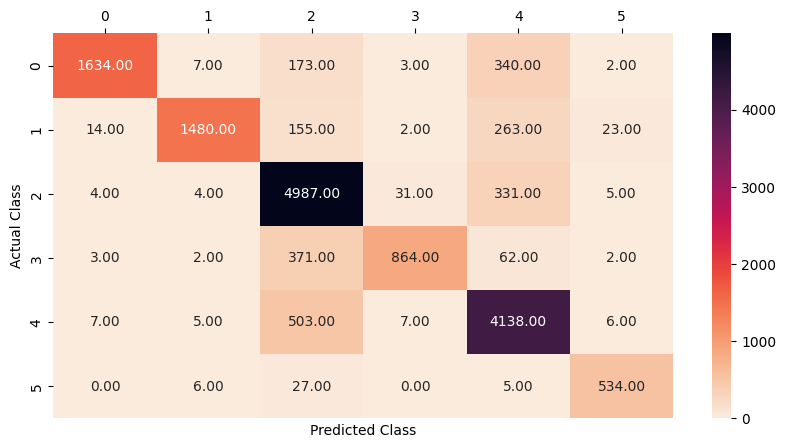

In [10]:
plt.figure(figsize = (10, 5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'rocket_r', fmt = '.2f', annot = True)
ax.set(xlabel = 'Predicted Class', ylabel = 'Actual Class')
ax.xaxis.tick_top()
plt.show()

In [11]:
from sklearn.metrics import roc_curve, auc

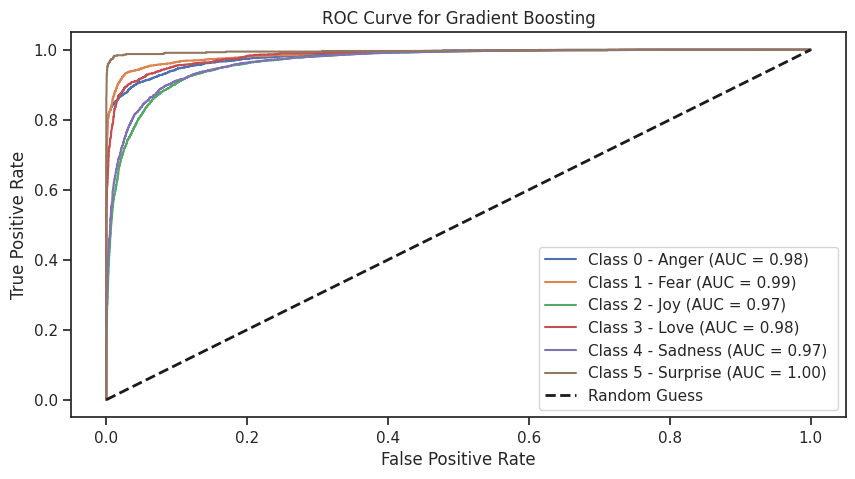

In [14]:
fpr = {}
tpr = {}
roc_auc = {}
sns.set_theme(style = 'ticks')

y_score = gbc.predict_proba(x_test)
n_classes = 6

plt.figure(figsize = (10, 5))

for i in range (n_classes):
  y_true_binary = (y_test == i).astype(int)
  y_score_binary = y_score[:, i]

  fpr[i], tpr[i], _ = roc_curve(y_true_binary, y_score_binary)
  roc_auc[i] = auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], label = f'Class {i} - {list(label_map.keys())[i].title()} (AUC = {roc_auc[i]:.2f}) ')

plt.plot([0, 1], [0, 1], 'k--', lw = 2, label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc = 'lower right')
plt.show()